In [1]:
import numpy as np
import pandas as pd
import pickle as pkl  
import matplotlib.pyplot as plt

dataDir = "../data/"

In [2]:
# Input data
fluData = pd.read_excel(dataDir + "influenza.xlsx")
menData = pd.read_excel(dataDir + "meningococcal.xlsx")

In [3]:
# Translation columns
#####################

# Months name to number
monthNumber = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}


# Age group to number
ageGroupNumber = {
    '00-04': 1,
    '05-09': 2,
    '10-14': 3,
    '15-19': 4,
    '20-24': 5,
    '25-29': 6,
    '30-34': 7,
    '35-39': 8,
    '40-44': 9,
    '45-49': 10,
    '50-54': 11,
    '55-59': 12,
    '60-64': 13,
    '65-69': 14,
    '70-74': 15,
    '75-79': 16,
    '80-85': 17,
    '85+': 18
}

In [4]:
# Menigococal Data
menData['Month'] = menData['Month'].str.strip()
menData['monthNumber'] = menData['Month'].map(monthNumber)
menData['date'] = pd.to_datetime(menData['monthNumber'].astype(str).str.cat(menData['Year'].astype(str),sep="-")).dt.strftime('%Y-%m')

# Influenza Data
fluData['date'] = pd.to_datetime(fluData['Week ending'].dt.month.astype(str).str.cat(fluData['Week ending'].dt.year.astype(str),sep="-")).dt.strftime('%Y-%m')

In [5]:
# Adding population of australia
# Source: http://www.worldometers.info/world-population/australia-population/
ausPop = {2008: 21342493,
          2009: 21739040,
          2010: 22120064,
          2011: 22479799,
          2012: 22821849,
          2013: 23150729,
          2014: 23474668,
          2015: 23799556,
          2016: 24125848,
          2017: 24450561,
          2018: 24772247
         }

# Saving Australia's population
pkl.dump(ausPop, open(dataDir + 'pkls/ausPop.pkl','wb'))

menData['ausPop'] = pd.to_datetime(menData.date).dt.year.map(ausPop)
fluData['ausPop'] = pd.to_datetime(fluData.date).dt.year.map(ausPop)

In [6]:
# Date Range
dateRange = {
    2008: ['2008-06','2008-12'],
    2009: ['2009-04','2009-11'],
    2010: ['2010-05','2010-12'],
    2011: ['2011-05','2011-12'],
    2012: ['2012-04','2012-11'],
    2013: ['2013-05','2013-12'],
    2014:['2014-05','2014-12'],
    2015:['2015-02','2015-12'],
    2016:['2016-05','2016-12'],
    2017:['2017-05','2017-12']
}

# Saving date range
pkl.dump(dateRange, open(dataDir + 'pkls/dateRange.pkl','wb'))

In [7]:
# Data to pickle
menData.to_pickle(dataDir + "pkls/menData.pkl")
fluData.to_pickle(dataDir + "pkls/fluData.pkl")

In [8]:
# Influenza data group
# When this cell is running, any column has the count information (Sex column is selected)
# Aggrupation made by year-month
fluSeries = fluData.groupby("date").count()['Sex'].rename("Flu")
fluSeries.to_pickle(dataDir + "pkls/fluSeries.pkl")

In [9]:
# Meningococcal data group
# When this cell is running, any column has the count information (Sex column is selected)
# Aggrupation made by year-month
menSeries = menData.groupby("date").count()['Sex'].rename("Men")
menSeries.to_pickle(dataDir + "pkls/menSeries.pkl")

# Visualizing data

In [10]:
# Loading data
menSeries = pd.read_pickle(dataDir + "pkls/menSeries.pkl")
fluSeries = pd.read_pickle(dataDir + "pkls/fluSeries.pkl")
ausPop = pd.read_pickle(dataDir + "pkls/ausPop.pkl")

## Influenza

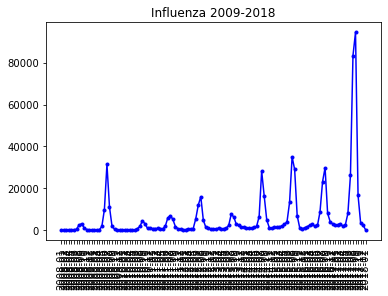

In [11]:
# Influenza plot grouped data by year-month
%matplotlib inline
plt.plot(fluSeries,'-b.')
plt.title("Influenza 2009-2018")
plt.xticks(rotation=90)
plt.show()

## Meningococcal

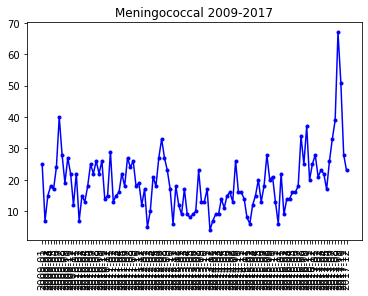

In [12]:
# Meningococcal plot grouped data by year-month
%matplotlib inline
plt.plot(menSeries,'-b.')
plt.title("Meningococcal 2009-2017")
plt.xticks(rotation=90)
plt.show()